## HW1 Problem 3
## Name: Vibhav Jha

### Imports

In [1]:
import nbconvert
import pandas as pd
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt

### 1. Loading the data set

#### a.

In [2]:
df = pd.read_csv ('data.csv')

#### b.

In [3]:
df.shape

(569, 33)

The dataframe lists itself as having 33 entries, id to Unnamed:32. The description on Kaggle lists it as having 32 columns, as it does not count Unnamed 32, which is an empty column. 

#### c. 

In [4]:
cols = df.columns
print(cols)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


### 2. Matrix scatter plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290D4A3A490>,
      dtype=object)

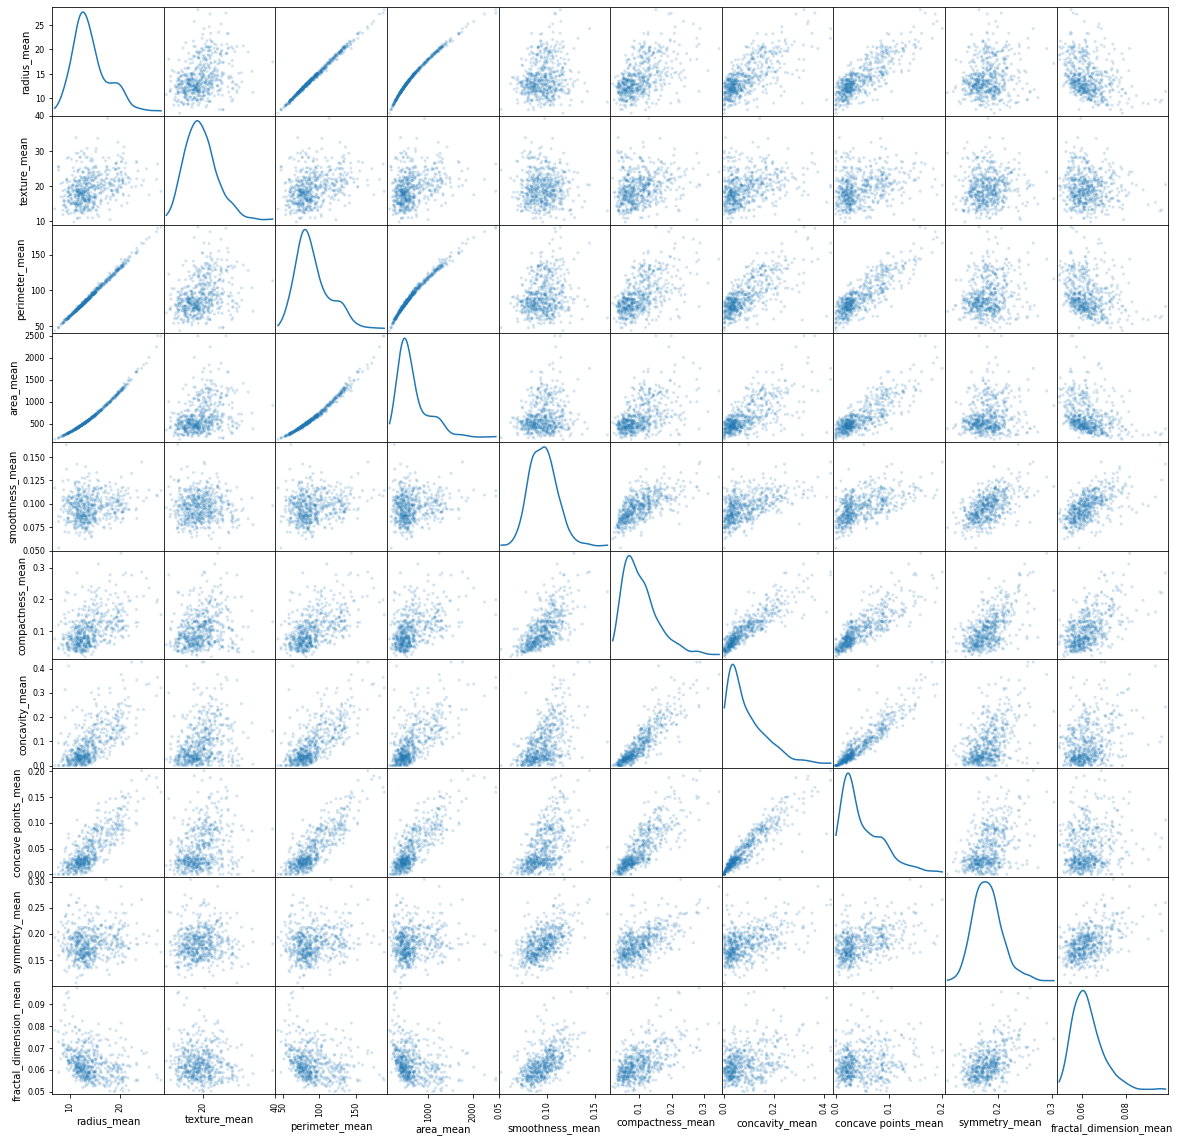

In [5]:
meanonlydf = df.filter(like = '_mean')
pd.plotting.scatter_matrix(meanonlydf, alpha = 0.2, figsize=(20, 20), diagonal='kde')

### 3. Calculations
#### a.

In [6]:
summary = df['diagnosis'].value_counts()
print(summary)

B    357
M    212
Name: diagnosis, dtype: int64


#### b.

In [7]:
data1 = df.to_numpy()
data2 = meanonlydf.to_numpy()
a = []
an = []
an3 = []
for i in range(10):
    a.append(np.mean(data2[:,i]))
    an.append(df.columns[i+2])
    an3.append(np.std(data2[:,i]))
    
data = {'ColumnNames': an, 'Mean': a, 'Standard Deviation': an3}

df2 = pd.DataFrame(data)

print(df2)

              ColumnNames        Mean  Standard Deviation
0             radius_mean   14.127292            3.520951
1            texture_mean   19.289649            4.297255
2          perimeter_mean   91.969033           24.277619
3               area_mean  654.889104          351.604754
4         smoothness_mean    0.096360            0.014052
5        compactness_mean    0.104341            0.052766
6          concavity_mean    0.088799            0.079650
7     concave points_mean    0.048919            0.038769
8           symmetry_mean    0.181162            0.027390
9  fractal_dimension_mean    0.062798            0.007054


#### c.

In [8]:
#malignant
monly =  df[(df['diagnosis'] == 'M')]
monlymeans = monly.filter(like = '_mean')
data3 = monlymeans.to_numpy()

cd = []
cd3 = []
for i in range(10):
    cd.append(np.mean(data3[:,i]))
    cd3.append(np.std(data3[:,i]))
    
data3 = {'Malignant ColumnNames': an, 'Mean': cd, 'Standard Deviation': cd3}
df3 = pd.DataFrame(data3)
print(df3)
print()

#Benign
bonly =  df[(df['diagnosis'] == 'B')]
bonlymeans = bonly.filter(like = '_mean')
data4 = bonlymeans.to_numpy()

cd = []
cd3 = []
for i in range(10):
    cd.append(np.mean(data4[:,i]))
    cd3.append(np.std(data4[:,i]))
    
data4_x = {'Benign ColumnNames': an, 'Mean': cd, 'Standard Deviation': cd3}
df4 = pd.DataFrame(data4_x)
print(df4)

    Malignant ColumnNames        Mean  Standard Deviation
0             radius_mean   17.462830            3.196406
1            texture_mean   21.604906            3.770546
2          perimeter_mean  115.365377           21.803048
3               area_mean  978.376415          367.069174
4         smoothness_mean    0.102898            0.012578
5        compactness_mean    0.145188            0.053860
6          concavity_mean    0.160775            0.074842
7     concave points_mean    0.087990            0.034293
8           symmetry_mean    0.192909            0.027573
9  fractal_dimension_mean    0.062680            0.007555

       Benign ColumnNames        Mean  Standard Deviation
0             radius_mean   12.146524            1.778016
1            texture_mean   17.914762            3.989525
2          perimeter_mean   78.075406           11.790889
3               area_mean  462.790196          134.098909
4         smoothness_mean    0.092478            0.013427
5        comp

#### d.

In [9]:
poff = data4[:,1][data4[:,1] > 15]

Bgreater15 = 100*(len(poff)/len(bonly))

print('Percentage of Benign Tumors with Radius at least 15: ', Bgreater15)

Percentage of Benign Tumors with Radius at least 15:  75.63025210084034


### 4. OLS
#### a.

In [11]:
y = df.area_mean.to_numpy()
x = df.radius_mean.to_numpy()

#linear
Aone = np.ones(len(x))
Atwo = x
Atot = np.vstack((Aone,Atwo)).T
#inter = Atot.T.dot(Atot)
reshapey = np.reshape(y, (569,1))
coeff = np.dot(lin.inv(np.dot(Atot.T, Atot)), np.dot(Atot.T, reshapey))

print('Linear OLS Coeff(constant, 1): ', coeff)

yfitlin = np.polyval([coeff[1], coeff[0]], x)

y_diff = y - yfitlin

r2 = np.square(y_diff)

r2sumlin = np.sum(r2)

print('Sum of Residuals Squared: ',r2sumlin)
#abc = np.polyfit(x,y,1,full=True)
#print(abc) #sanity check

Linear OLS Coeff(constant, 1):  [[-738.0367042 ]
 [  98.59821922]]
Sum of Residuals Squared:  1767428.9562542238


#### b.

In [12]:
#quadratic
Athree = np.square(x)
Atot2 = np.vstack((Aone,Atwo,Athree)).T
coeff_2 = np.dot(lin.inv(np.dot(Atot2.T, Atot2)), np.dot(Atot2.T, reshapey))

print('Quadratic OLS Coeff(constant, 1, 2): ', coeff_2)

yfitqd = np.polyval([coeff_2[2], coeff_2[1], coeff_2[0]], x)

y_diffqd = y - yfitqd

r2qd = np.square(y_diffqd)

r2sumqd = np.sum(r2qd)

print('Sum of Residuals Squared: ',r2sumqd)
#abc = np.polyfit(x,y,2,full=True)
#print(abc) #sanity check


Quadratic OLS Coeff(constant, 1, 2):  [[-10.5164038 ]
 [  0.43684601]
 [  3.10992516]]
Sum of Residuals Squared:  123097.70230710594


### 5. Plots
#### a.

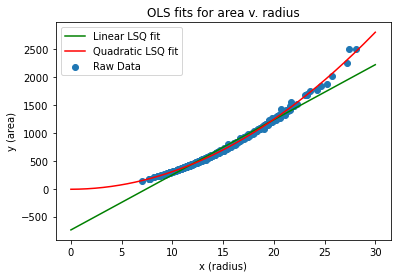

In [13]:
fig, ax = plt.subplots()

ax.scatter(x,y, label='Raw Data')
yfitlin = np.polyval([coeff[1], coeff[0]], np.arange(0,30,0.0528))
plt.plot(np.arange(0,30,0.0528), yfitlin, c= "green", label='Linear LSQ fit')
yfitqd = np.polyval([coeff_2[2], coeff_2[1], coeff_2[0]], np.arange(0,30,0.0528))
plt.plot(np.arange(0,30,0.0528), yfitqd, c= "red", label='Quadratic LSQ fit')

plt.xlabel('x (radius)')
plt.ylabel('y (area)')
plt.title("OLS fits for area v. radius")

plt.legend()
plt.show()

####  b.

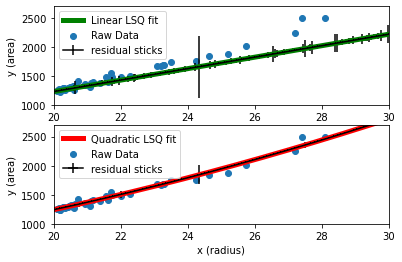

In [15]:

fig2, (ax1, ax2) = plt.subplots(2, 1)

ax1.scatter(x,y, label='Raw Data')
ax1.plot(np.arange(0,30,0.0528), yfitlin, c= "green", label='Linear LSQ fit',  linewidth=5)
xx = np.arange(0,30,0.0528)
ax1.errorbar(xx, yfitlin, yerr = y_diff, marker=',', c='black', label='residual sticks')
ax1.set_xlim([20, 30])
ax1.set_ylim([1000, 2700])

ax1.set_ylabel('y (area)')
ax1.legend()

ax2.scatter(x,y, label='Raw Data')
ax2.plot(np.arange(0,30,0.0528), yfitqd, c= "red", label='Quadratic LSQ fit', linewidth=5)
y2 = y-yfitqd
ax2.errorbar(xx, yfitqd, xerr = 0, yerr = y_diffqd, marker=',', c='black', label='residual sticks')
plt.xlim([20, 30])
ax2.set_ylim([1000, 2700])

plt.xlabel('x (radius)')
plt.ylabel('y (area)')
plt.legend()